<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/Fast_Melt_Quench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


In [1]:
!pip install -q dgl -f https://data.dgl.ai/wheels/torch-2.1/repo.html
!pip install -q git+https://github.com/usnistgov/alignn.git@develop
!pip install -q git+https://github.com/usnistgov/intermat.git@develop

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.8/170.8 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.4/456.4 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 797.2/797.2 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
#https://linuxtut.com/en/dd9c3ed201ce2eac4757/
import time
import numpy as np
from ase import units
from ase.md.nvtberendsen import NVTBerendsen
from ase.md.velocitydistribution import MaxwellBoltzmannDistribution
from matplotlib.animation import FuncAnimation
from ase.visualize.plot import plot_atoms
from ase.io.trajectory import Trajectory
from ase.geometry.analysis import Analysis
from jarvis.core.atoms import Atoms, get_supercell_dims
from alignn.ff.ff import AlignnAtomwiseCalculator
from jarvis.db.figshare import data, get_jid_data
from jarvis.core.atoms import Atoms
from jarvis.io.vasp.inputs import Poscar
from ase.io.trajectory import Trajectory
from jarvis.core.atoms import ase_to_atoms
import matplotlib.pyplot as plt
calc = AlignnAtomwiseCalculator()

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)
dir_path /usr/local/lib/python3.10/site-packages/alignn/ff/v12.2.2024_dft_3d_307k


100%|██████████| 549k/549k [00:00<00:00, 939kiB/s]
/usr/local/lib/python3.10/site-packages/alignn/ff/ff.py:266: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['international']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(


System
1.0
10.98726 0.0 0.0
0.0 10.98726 0.0
0.0 0.0 10.98726
Si 
64 
direct
0.125 0.375 0.125 Si
0.125 0.375 0.625 Si
0.125 0.8750000000000001 0.125 Si
0.125 0.8750000000000001 0.625 Si
0.625 0.375 0.125 Si
0.625 0.375 0.625 Si
0.625 0.8750000000000001 0.125 Si
0.625 0.8750000000000001 0.625 Si
0.0 0.0 0.25 Si
0.0 0.0 0.75 Si
0.0 0.5 0.25 Si
0.0 0.5 0.75 Si
0.5 0.0 0.25 Si
0.5 0.0 0.75 Si
0.5 0.5 0.25 Si
0.5 0.5 0.75 Si
0.125 0.125 0.375 Si
0.125 0.125 0.8750000000000001 Si
0.125 0.625 0.375 Si
0.125 0.625 0.8750000000000001 Si
0.625 0.125 0.375 Si
0.625 0.125 0.8750000000000001 Si
0.625 0.625 0.375 Si
0.625 0.625 0.8750000000000001 Si
0.0 0.25 0.0 Si
0.0 0.25 0.5 Si
0.0 0.75 0.0 Si
0.0 0.75 0.5 Si
0.5 0.25 0.0 Si
0.5 0.25 0.5 Si
0.5 0.75 0.0 Si
0.5 0.75 0.5 Si
0.375 0.375 0.375 Si
0.375 0.375 0.8750000000000001 Si
0.375 0.8750000000000001 0.375 Si
0.375 0.8750000000000001 0.8750000000000001 Si
0.8750000000000001 0.375 0.375 Si
0.8750000000000001 0.375 0.8750000000000001 Si
0.87500000

<ipython-input-4-5a0c7dbb2d0d>:12: DeprecationWarning: Please use atoms.calc = calc
  atoms.set_calculator(calc)
/usr/local/lib/python3.10/site-packages/ase/md/md.py:53: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


time=    0 fs T= 5342 K
time=   20 fs T= 3452 K
time=   40 fs T= 4180 K
time=   60 fs T= 4051 K
time=   80 fs T= 4980 K
time=  100 fs T= 4771 K
time=  120 fs T= 5375 K
time=  140 fs T= 5289 K
time=  160 fs T= 5477 K
time=  180 fs T= 5750 K
time=  200 fs T= 5668 K
time=  220 fs T= 5772 K
time=  240 fs T= 5238 K
time=  260 fs T= 5704 K
time=  280 fs T= 5834 K
time=  300 fs T= 5430 K
time=  320 fs T= 5576 K
time=  340 fs T= 5833 K
time=  360 fs T= 5656 K
time=  380 fs T= 5573 K
time=  400 fs T= 5180 K
time=  420 fs T= 5927 K
time=  440 fs T= 5631 K
time=  460 fs T= 5462 K
time=  480 fs T= 5605 K
time=  500 fs T= 5658 K
time=  520 fs T= 5691 K
time=  540 fs T= 6085 K
time=  560 fs T= 5867 K
time=  580 fs T= 5832 K
time=  600 fs T= 5379 K
time=  620 fs T= 5664 K
time=  640 fs T= 5820 K
time=  660 fs T= 5621 K
time=  680 fs T= 5444 K
time=  700 fs T= 5659 K
time=  720 fs T= 5671 K
time=  740 fs T= 5750 K
time=  760 fs T= 5686 K
time=  780 fs T= 5048 K
time=  800 fs T= 5254 K
time=  820 fs T=

MovieWriter imagemagick unavailable; using Pillow instead.


Time taken 978.728898525238
System
1.0
10.98726 0.0 0.0
0.0 10.98726 0.0
0.0 0.0 10.98726
Si 
64 
direct
0.19629654874866126 0.10250773516051055 0.13441673095046058 Si
-0.10332970827381333 -0.18781476194462088 0.41135725542436546 Si
-0.1002801820666198 1.431591083776406 -0.27046685574051893 Si
0.07905851585717757 1.490198531606521 0.6225506820881584 Si
0.5287099156446167 0.0480206112583125 0.12349549998874708 Si
0.9786252498682855 0.41473222750517674 1.2472921155214676 Si
0.37556097966991064 1.0660025696853017 -0.3902443320617873 Si
0.8864358457279317 0.6951406759514306 0.8084873009817917 Si
0.22348565546026353 -0.7026875951808653 0.07801453707238944 Si
-0.423349329578352 -0.2033659812564067 0.9123969806356593 Si
0.42706645882284217 0.3891848478519879 0.5715070321842999 Si
-0.6051346053677943 0.3980111820064123 0.36213768920235223 Si
0.1292947651084675 0.2919711236596335 0.8805211435032174 Si
0.7077212676102022 -0.25490687575219545 0.3425247124328009 Si
-0.21174928874877874 0.212973607

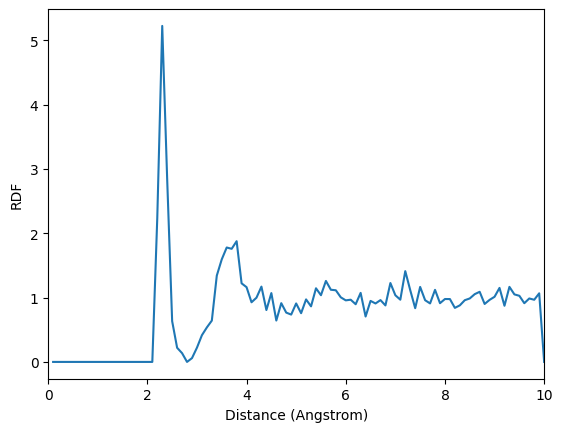

In [4]:
def get_atoms(jid):
    dat = get_jid_data(jid=jid, dataset="dft_3d")
    atoms= Atoms.from_dict(dat["atoms"]).get_conventional_atoms
    dim = get_supercell_dims(atoms,enforce_c_size=10)
    atoms = atoms.make_supercell([dim[0], dim[1], dim[2]])
    print(atoms)
    return atoms.ase_converter()

jid='JVASP-41'
jid='JVASP-1002'
atoms = get_atoms(jid)
atoms.set_calculator(calc)
t1=time.time()

dt = 1 * units.fs

temp0, nsteps0 = 5500, 1000
temp1, nsteps1 = 300, 2000
taut = 20*units.fs

MaxwellBoltzmannDistribution(atoms, temp0*units.kB)
dyn = NVTBerendsen(atoms, dt, temp0, taut=taut, trajectory='md.traj')
def myprint():
    print(f'time={dyn.get_time() / units.fs: 5.0f} fs ' + \
          f'T={atoms.get_temperature(): 3.0f} K')
dyn.attach(myprint, interval=20)
dyn.run(nsteps0)

#Raise the temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)


traj =  Trajectory('md.traj')

fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20



t2=time.time()
print('Time taken', t2-t1)
def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)

    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t, temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)

    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')

    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')
ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani_si_2k.gif', writer="imagemagick")
plt.close()

traj = Trajectory('md.traj')
atoms=ase_to_atoms(traj[-1])
print(atoms)
dists=[]
for i in atoms.get_all_neighbors(r=10):
    for j in i:
      dists.append(j[2])
dists=np.array(dists)
hist, bins = np.histogram(dists, bins=np.arange(0.1, 10.2, 0.1))
number_density = atoms.num_atoms / atoms.volume
shell_vol = (
            4.0
            / 3.0
            * np.pi
            * (np.power(bins[1:], 3) - np.power(bins[:-1], 3))
        )
rdf = (
            hist / shell_vol / number_density / atoms.num_atoms
        )
plt.plot(bins[:-1], rdf)
plt.xlim([0,10])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('RDF')
# plt.savefig('rdf.png')
# plt.close()
plt.show()


In [7]:
!ls -altr

total 10792
drwxr-xr-x 4 root root     4096 Nov 25 19:13 .config
drwxr-xr-x 1 root root     4096 Nov 25 19:13 sample_data
drwxr-xr-x 1 root root     4096 Dec  2 15:50 ..
-rw-r--r-- 1 root root    22944 Dec  2 15:58 condacolab_install.log
-rw-r--r-- 1 root root 10643271 Dec  2 16:53 md.traj
drwxr-xr-x 1 root root     4096 Dec  2 16:54 .
-rw-r--r-- 1 root root   361636 Dec  2 16:54 ani_si_2k.gif


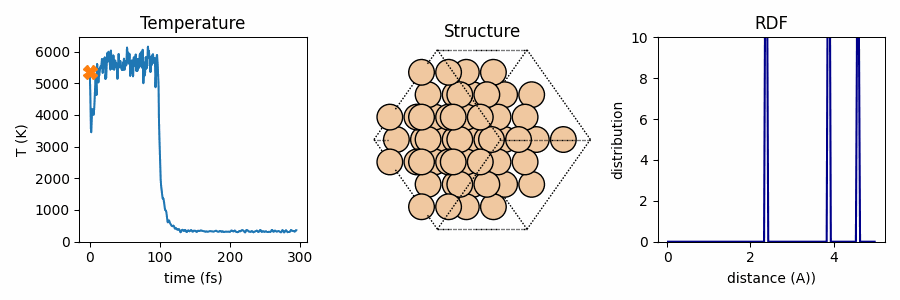

In [9]:
from IPython.display import Image, display

display(Image(filename='ani_si_2k.gif'))


Obtaining 3D dataset 76k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Other versions:https://doi.org/10.6084/m9.figshare.6815699
Loading the zipfile...
Loading completed.


/usr/local/lib/python3.10/site-packages/spglib/spglib.py:115: DeprecationWarning: dict interface (SpglibDataset['number']) is deprecated.Use attribute interface ({self.__class__.__name__}.{key}) instead
  warnings.warn(
<timed exec>:12: DeprecationWarning: Please use atoms.calc = calc
/usr/local/lib/python3.10/site-packages/ase/md/md.py:53: FutureWarning: Specify the temperature in K using the 'temperature_K' argument
  warnings.warn(FutureWarning(w))


System
1.0
7.40589 -12.82737 0.0
7.40589 12.82737 0.0
0.0 0.0 10.89862
Si O 
54 108 
direct
0.17816363699811932 7.571146655805419e-18 0.3333333333333333 Si
0.17816363699811932 7.571146655805419e-18 0.8333333333333334 Si
0.1781636369981193 0.33333333333333326 0.3333333333333333 Si
0.1781636369981193 0.33333333333333326 0.8333333333333334 Si
0.17816363699811935 0.6666666666666666 0.3333333333333333 Si
0.17816363699811935 0.6666666666666666 0.8333333333333334 Si
0.5114969703314526 5.3773709651121834e-18 0.3333333333333333 Si
0.5114969703314526 5.3773709651121834e-18 0.8333333333333334 Si
0.5114969703314526 0.3333333333333333 0.3333333333333333 Si
0.5114969703314526 0.3333333333333333 0.8333333333333334 Si
0.5114969703314527 0.6666666666666667 0.3333333333333333 Si
0.5114969703314527 0.6666666666666667 0.8333333333333334 Si
0.844830303664786 6.764084587053246e-18 0.3333333333333333 Si
0.844830303664786 6.764084587053246e-18 0.8333333333333334 Si
0.844830303664786 0.3333333333333334 0.33333

MovieWriter imagemagick unavailable; using Pillow instead.


Time taken 4797.506721496582
System
1.0
7.40589 -12.82737 0.0
7.40589 12.82737 0.0
0.0 0.0 10.89862
Si O 
54 108 
direct
0.23941681217239388 0.029095020967098897 0.3500422728199266 Si
0.20989294976151282 0.005827981811184643 0.8265121815729902 Si
0.2009753927121448 0.3300736836042159 0.3223838000617483 Si
0.10492375498878599 0.3307616424463461 0.8595363668173597 Si
0.13873813332637766 0.625183380837319 0.27289126391055524 Si
0.18092306607132963 0.6781603517313347 0.8082048711288053 Si
0.5277164687134966 0.004111097771826124 0.32599626010318594 Si
0.5078501662857268 -0.021391695773595745 0.9528852745950753 Si
0.5173069550735816 0.3615890322881627 0.31942206201401135 Si
0.5752696507400136 0.3259596060658998 0.7651071350481528 Si
0.3525787284716389 0.6198639081962507 0.44892182881821946 Si
0.4882217526370303 0.6397392628790577 0.8107158043877337 Si
0.8714877384997305 0.08707816435188542 0.3702880839811753 Si
0.8418118153776506 -0.021857287811573766 0.8234467076405926 Si
0.9257052515430897

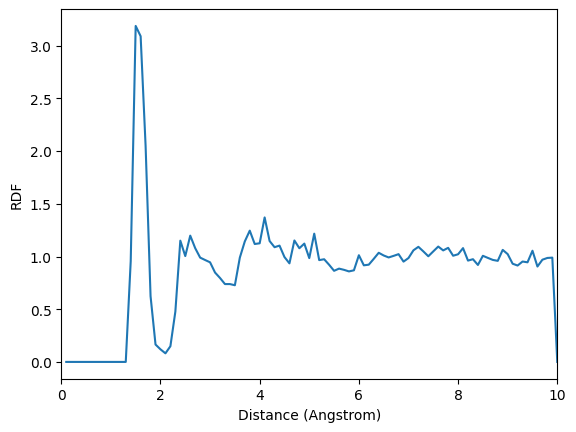

CPU times: user 1h 1min 42s, sys: 28min 15s, total: 1h 29min 57s
Wall time: 1h 20min 50s


In [10]:
%%time
def get_atoms(jid):
    dat = get_jid_data(jid=jid, dataset="dft_3d")
    atoms= Atoms.from_dict(dat["atoms"]).get_conventional_atoms
    dim = get_supercell_dims(atoms,enforce_c_size=10)
    atoms = atoms.make_supercell([dim[0], dim[1], dim[2]])
    print(atoms)
    return atoms.ase_converter()

jid='JVASP-41'
#jid='JVASP-1002'
atoms = get_atoms(jid)
atoms.set_calculator(calc)
t1=time.time()

dt = 1 * units.fs

temp0, nsteps0 = 5500, 1000
temp1, nsteps1 = 300, 2000
taut = 20*units.fs

MaxwellBoltzmannDistribution(atoms, temp0*units.kB)
dyn = NVTBerendsen(atoms, dt, temp0, taut=taut, trajectory='md.traj')
def myprint():
    print(f'time={dyn.get_time() / units.fs: 5.0f} fs ' + \
          f'T={atoms.get_temperature(): 3.0f} K')
dyn.attach(myprint, interval=20)
dyn.run(nsteps0)

#Raise the temperature
dyn.set_temperature(temp1)
dyn.run(nsteps1)


traj =  Trajectory('md.traj')

fig, ax = plt.subplots(1, 3, figsize=(9,3), tight_layout=True)

t = np.arange(nsteps0+nsteps1+1) * dt
temp = [atoms.get_temperature() for atoms in traj]

nframes = 20



t2=time.time()
print('Time taken', t2-t1)
def update(iframe):
    idx = int((nsteps0+nsteps1)*iframe/nframes)

    ax[0].clear()
    ax[0].set_title('Temperature')
    ax[0].set_xlabel('time (fs)')
    ax[0].set_ylabel('T (K)')
    ax[0].plot(t, temp)
    ax[0].plot(t[idx], temp[idx], marker='X', markersize=10)

    ax[1].clear()
    ax[1].set_title('Structure')
    ax[1].axis('off')
    plot_atoms(traj[idx], ax=ax[1], rotation='45x,45y')

    distribution, distance = Analysis(traj[idx]).get_rdf(rmax=5., nbins=100, return_dists=True)[0]
    ax[2].clear()
    ax[2].set_title('RDF')
    ax[2].set_ylim((0,10))
    ax[2].set_xlabel('distance (A))')
    ax[2].set_ylabel('distribution')
    ax[2].plot(distance, distribution, color='darkblue')
ani = FuncAnimation(fig, update, np.arange(nframes), blit=False, interval=250.)
ani.save('ani_sio2_2k.gif', writer="imagemagick")
plt.close()

traj = Trajectory('md.traj')
atoms=ase_to_atoms(traj[-1])
print(atoms)
dists=[]
for i in atoms.get_all_neighbors(r=10):
    for j in i:
      dists.append(j[2])
dists=np.array(dists)
hist, bins = np.histogram(dists, bins=np.arange(0.1, 10.2, 0.1))
number_density = atoms.num_atoms / atoms.volume
shell_vol = (
            4.0
            / 3.0
            * np.pi
            * (np.power(bins[1:], 3) - np.power(bins[:-1], 3))
        )
rdf = (
            hist / shell_vol / number_density / atoms.num_atoms
        )
plt.plot(bins[:-1], rdf)
plt.xlim([0,10])
plt.xlabel('Distance (Angstrom)')
plt.ylabel('RDF')
# plt.savefig('rdf.png')
# plt.close()
plt.show()


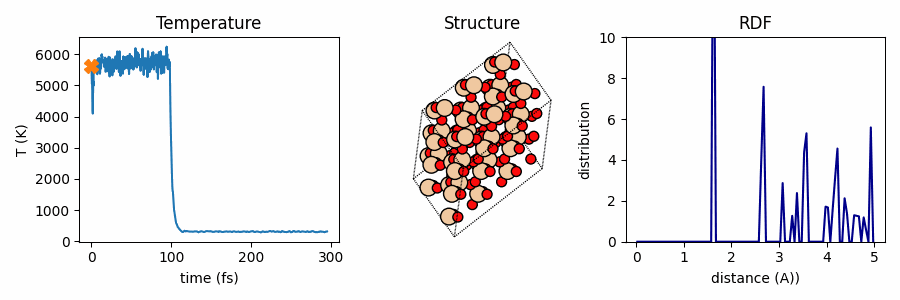

In [11]:
from IPython.display import Image, display

display(Image(filename='ani_sio2_2k.gif'))
